## Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore")

In [38]:
# from IPython import display
# pd.set_option("display.max_columns",None)
# pd.set_option("display.max_rows",None)

## Problem statement

In [ ]:
BUILDING A GOLD PRICE PREDICTION MODEL USING LINEAR REGRESSION ML ALGO


In [ ]:
The project title is "Gold Prediction model" predict the gold ETF price based on the previous year
data of gold price.The main goal of our project is to forecast the rise and fall of gold price that 
help investors to invest in it or not


## Data Gathering and Data analysis

In [2]:
df=pd.read_csv("FINAL_USO.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [ ]:
# SP  >standerd and poor
# DJ  >dow jones 
# EG  >eldorado gold co
# EU  >europian union
# OF  >cruid oil feature
# OS  >Officina Stellare 
# SF  >Stifel Financial
# USB >US bancorp
# PLT >platinum
# PLD >pallidium
# RHO >Rhodium 
# USDI>US dollar currency index
# GDX >VanEck Gold Miners 
# USO >US oil


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

In [4]:
df.shape

(1718, 81)

In [5]:
df["DJ_open"].unique()

array([11825.29004, 11870.25   , 11866.54004, ..., 22629.06055,
       23213.60938, 23153.93945])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


## EDA

### missing values

In [8]:
df.isna().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

### outliers

<AxesSubplot:>

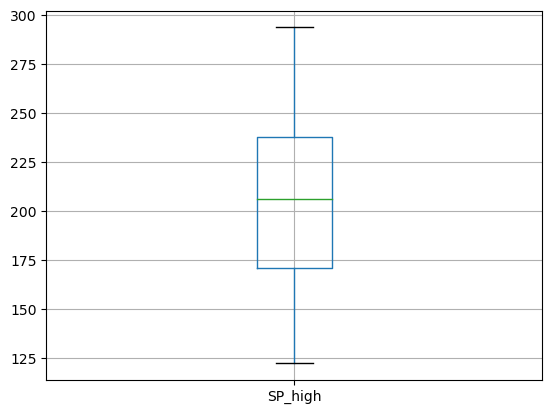

In [9]:
df[["SP_high"]].boxplot()

In [10]:
q1=df["Close"].quantile(0.25)
q2=df["Close"].quantile(0.50)
q3=df["Close"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
df[((df["Close"]>upper_limit) | (df["Close"]<lower_limit))]

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,2013-04-05,151.539993,152.960007,151.070007,152.809998,152.809998,14491800,153.949997,155.350006,153.770004,...,34.830002,35.060001,33.663769,21249100,33.080002,33.310001,32.919998,33.279999,33.279999,5820700
321,2013-04-08,152.389999,152.589996,151.600006,152.160004,152.160004,6246000,155.270004,156.220001,154.750000,...,34.509998,34.650002,33.270092,18689700,33.310001,33.500000,33.090000,33.490002,33.490002,3063800
322,2013-04-09,152.320007,153.850006,152.279999,153.339996,153.339996,7042200,156.500000,157.320007,155.979996,...,34.669998,36.029999,34.595131,20471900,33.330002,33.799999,33.230000,33.639999,33.639999,3646500
323,2013-04-10,152.669998,152.710007,150.580002,150.750000,150.750000,18507400,157.169998,158.869995,157.130005,...,34.619999,34.650002,33.270092,26201600,33.540001,33.919998,33.459999,33.830002,33.830002,3904900


In [11]:
q1=df["EG_open"].quantile(0.25)
q2=df["EG_open"].quantile(0.50)
q3=df["EG_open"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
df[((df["EG_open"]<upper_limit) & (df["EG_open"]>lower_limit))]

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
5,2011-12-22,156.350006,156.800003,155.330002,156.039993,156.039993,9888400,124.629997,125.400002,124.230003,...,51.770000,52.400002,49.656178,13179600,38.270000,38.549999,38.209999,38.279999,38.279999,5376800
6,2011-12-23,156.350006,156.490005,155.820007,156.309998,156.309998,3565100,125.669998,126.430000,125.410004,...,52.349998,52.790001,50.169365,4729000,38.470001,38.610001,38.369999,38.490002,38.490002,2162200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,...,20.650000,21.090000,21.090000,60507000,9.490000,9.520000,9.280000,9.290000,9.290000,21598200
1714,2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,...,20.530001,20.620001,20.620001,76365200,9.250000,9.920000,9.230000,9.900000,9.900000,40978800
1715,2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,...,20.700001,20.969999,20.969999,52393000,9.590000,9.650000,9.370000,9.620000,9.620000,36578700
1716,2018-12-28,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,...,20.570000,20.600000,20.600000,49835000,9.540000,9.650000,9.380000,9.530000,9.530000,22803400


In [12]:
q1=df["GDX_Open"].quantile(0.25)
q2=df["GDX_Open"].quantile(0.50)
q3=df["GDX_Open"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
df[((df["GDX_Open"]<upper_limit) & (df["GDX_Open"]>lower_limit))]

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
290,2013-02-21,152.000000,153.410004,151.899994,152.619995,152.619995,17964800,150.960007,151.419998,149.940002,...,37.490002,38.119999,36.601902,23221700,33.500000,33.689999,33.349998,33.430000,33.430000,7793300
296,2013-03-01,153.160004,153.610001,152.139999,152.440002,152.440002,11178800,151.089996,152.339996,150.410004,...,37.020000,37.110001,35.632130,13137000,32.660000,32.779999,32.410000,32.740002,32.740002,4953300
297,2013-03-04,152.449997,152.740005,151.869995,152.300003,152.300003,6643800,151.759995,152.919998,151.520004,...,35.889999,35.910000,34.479916,24525200,32.599998,32.610001,32.160000,32.400002,32.400002,6009300
298,2013-03-05,153.100006,153.389999,152.110001,152.380005,152.380005,10804200,153.660004,154.699997,153.639999,...,35.900002,35.930000,34.499123,17759700,32.540001,32.740002,32.400002,32.689999,32.689999,4195700
299,2013-03-06,152.169998,153.380005,151.649994,153.229996,153.229996,10856000,154.839996,154.919998,154.160004,...,35.570000,37.439999,35.948986,33784100,32.590000,32.590000,32.230000,32.540001,32.540001,4855900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,...,20.650000,21.090000,21.090000,60507000,9.490000,9.520000,9.280000,9.290000,9.290000,21598200
1714,2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,...,20.530001,20.620001,20.620001,76365200,9.250000,9.920000,9.230000,9.900000,9.900000,40978800
1715,2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,...,20.700001,20.969999,20.969999,52393000,9.590000,9.650000,9.370000,9.620000,9.620000,36578700
1716,2018-12-28,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,...,20.570000,20.600000,20.600000,49835000,9.540000,9.650000,9.380000,9.530000,9.530000,22803400


In [13]:
q1=df["GDX_Close"].quantile(0.25)
q2=df["GDX_Close"].quantile(0.50)
q3=df["GDX_Close"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
df1=df[((df["GDX_Close"]<upper_limit) & (df["GDX_Close"]>lower_limit))]
df1

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
295,2013-02-28,154.089996,154.160004,152.389999,153.000000,153.000000,14864400,151.899994,152.869995,151.410004,...,37.220001,37.400002,35.910580,15832200,33.389999,33.500000,32.959999,33.060001,33.060001,5313000
296,2013-03-01,153.160004,153.610001,152.139999,152.440002,152.440002,11178800,151.089996,152.339996,150.410004,...,37.020000,37.110001,35.632130,13137000,32.660000,32.779999,32.410000,32.740002,32.740002,4953300
297,2013-03-04,152.449997,152.740005,151.869995,152.300003,152.300003,6643800,151.759995,152.919998,151.520004,...,35.889999,35.910000,34.479916,24525200,32.599998,32.610001,32.160000,32.400002,32.400002,6009300
298,2013-03-05,153.100006,153.389999,152.110001,152.380005,152.380005,10804200,153.660004,154.699997,153.639999,...,35.900002,35.930000,34.499123,17759700,32.540001,32.740002,32.400002,32.689999,32.689999,4195700
300,2013-03-07,153.020004,153.210007,152.399994,152.690002,152.690002,6586700,154.699997,154.979996,154.520004,...,36.869999,36.910000,35.440090,22037400,32.759998,33.000000,32.709999,32.939999,32.939999,5622500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,...,20.650000,21.090000,21.090000,60507000,9.490000,9.520000,9.280000,9.290000,9.290000,21598200
1714,2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,...,20.530001,20.620001,20.620001,76365200,9.250000,9.920000,9.230000,9.900000,9.900000,40978800
1715,2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,...,20.700001,20.969999,20.969999,52393000,9.590000,9.650000,9.370000,9.620000,9.620000,36578700
1716,2018-12-28,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,...,20.570000,20.600000,20.600000,49835000,9.540000,9.650000,9.380000,9.530000,9.530000,22803400


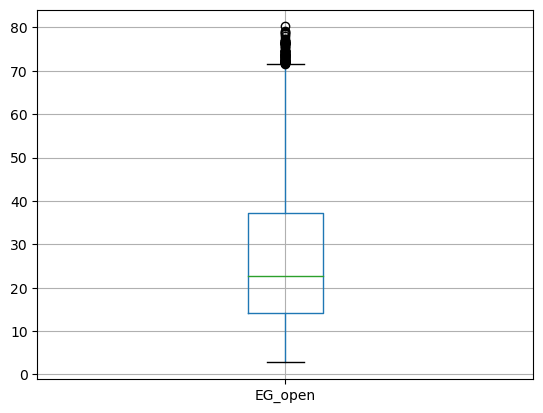

In [14]:
df[["EG_open"]].boxplot()
plt.show()

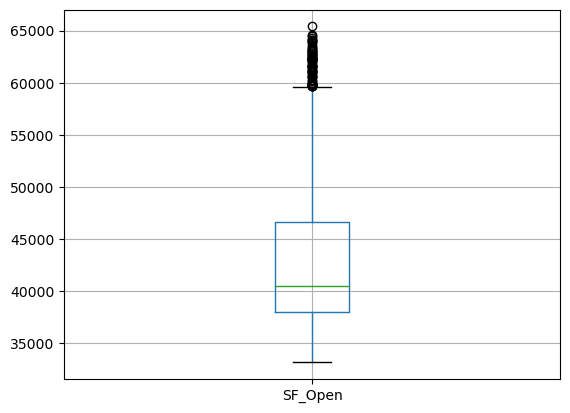

In [15]:
df[["SF_Open"]].boxplot()
plt.show()

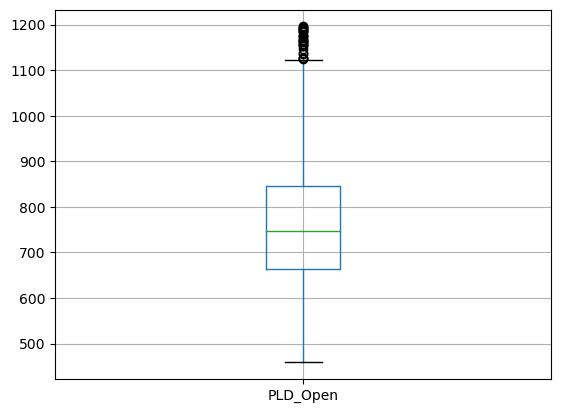

In [16]:
df[["PLD_Open"]].boxplot()
plt.show()

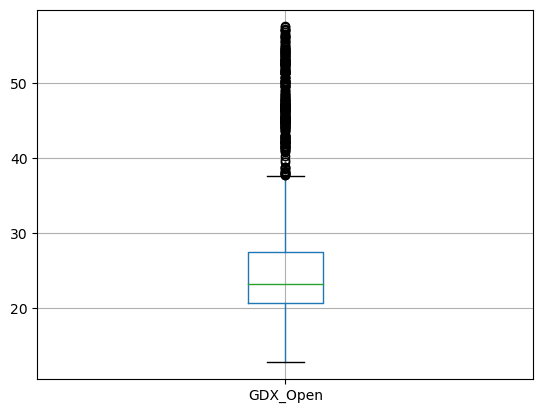

In [17]:
df[["GDX_Open"]].boxplot()
plt.show()

In [18]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

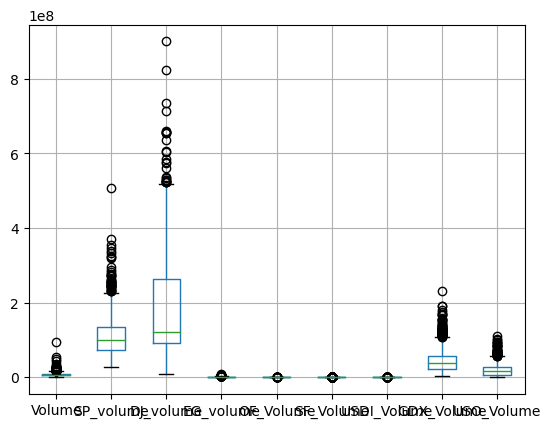

In [19]:
df[["Volume","SP_volume","DJ_volume","EG_volume","OF_Volume","SF_Volume","USDI_Volume","GDX_Volume","USO_Volume"]].boxplot()
plt.show()

In [20]:
q1=df["Volume"].quantile(0.25)
q2=df["Volume"].quantile(0.50)
q3=df["Volume"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)
df[((df["Volume"]<upper_limit) & (df["Volume"]>lower_limit))]

17400487.5
-1779612.5


,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
5,2011-12-22,156.350006,156.800003,155.330002,156.039993,156.039993,9888400,124.629997,125.400002,124.230003,...,51.770000,52.400002,49.656178,13179600,38.270000,38.549999,38.209999,38.279999,38.279999,5376800
6,2011-12-23,156.350006,156.490005,155.820007,156.309998,156.309998,3565100,125.669998,126.430000,125.410004,...,52.349998,52.790001,50.169365,4729000,38.470001,38.610001,38.369999,38.490002,38.490002,2162200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,...,20.650000,21.090000,21.090000,60507000,9.490000,9.520000,9.280000,9.290000,9.290000,21598200
1714,2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,...,20.530001,20.620001,20.620001,76365200,9.250000,9.920000,9.230000,9.900000,9.900000,40978800
1715,2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,...,20.700001,20.969999,20.969999,52393000,9.590000,9.650000,9.370000,9.620000,9.620000,36578700
1716,2018-12-28,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,...,20.570000,20.600000,20.600000,49835000,9.540000,9.650000,9.380000,9.530000,9.530000,22803400


In [21]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
295,2013-02-28,154.089996,154.160004,152.389999,153.000000,153.000000,14864400,151.899994,152.869995,151.410004,...,37.220001,37.400002,35.910580,15832200,33.389999,33.500000,32.959999,33.060001,33.060001,5313000
296,2013-03-01,153.160004,153.610001,152.139999,152.440002,152.440002,11178800,151.089996,152.339996,150.410004,...,37.020000,37.110001,35.632130,13137000,32.660000,32.779999,32.410000,32.740002,32.740002,4953300
297,2013-03-04,152.449997,152.740005,151.869995,152.300003,152.300003,6643800,151.759995,152.919998,151.520004,...,35.889999,35.910000,34.479916,24525200,32.599998,32.610001,32.160000,32.400002,32.400002,6009300
298,2013-03-05,153.100006,153.389999,152.110001,152.380005,152.380005,10804200,153.660004,154.699997,153.639999,...,35.900002,35.930000,34.499123,17759700,32.540001,32.740002,32.400002,32.689999,32.689999,4195700
300,2013-03-07,153.020004,153.210007,152.399994,152.690002,152.690002,6586700,154.699997,154.979996,154.520004,...,36.869999,36.910000,35.440090,22037400,32.759998,33.000000,32.709999,32.939999,32.939999,5622500


In [22]:
df1.corr()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Open,1.000000,0.998069,0.998125,0.996308,0.996308,0.224599,-0.226459,-0.226729,-0.223779,-0.224827,...,0.917145,0.913434,0.907153,-0.237390,0.425365,0.423928,0.427797,0.426903,0.426903,-0.394598
High,0.998069,1.000000,0.997312,0.998316,0.998316,0.242746,-0.237994,-0.238234,-0.235521,-0.236495,...,0.915832,0.914613,0.907679,-0.223122,0.430642,0.429420,0.433104,0.432374,0.432374,-0.392514
Low,0.998125,0.997312,1.000000,0.998287,0.998287,0.197700,-0.216440,-0.216910,-0.213643,-0.214838,...,0.918698,0.915636,0.909938,-0.251834,0.422762,0.421322,0.425365,0.424436,0.424436,-0.398330
Close,0.996308,0.998316,0.998287,1.000000,1.000000,0.214943,-0.226735,-0.227128,-0.224090,-0.225226,...,0.917389,0.916996,0.910772,-0.238022,0.426399,0.425132,0.429003,0.428239,0.428239,-0.395600
Adj Close,0.996308,0.998316,0.998287,1.000000,1.000000,0.214943,-0.226735,-0.227128,-0.224090,-0.225226,...,0.917389,0.916996,0.910772,-0.238022,0.426399,0.425132,0.429003,0.428239,0.428239,-0.395600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USO_High,0.423928,0.429420,0.421322,0.425132,0.425132,-0.037524,-0.666005,-0.667305,-0.664495,-0.666423,...,0.374039,0.375122,0.325253,-0.362891,0.999846,1.000000,0.999809,0.999874,0.999874,-0.660616
USO_Low,0.427797,0.433104,0.425365,0.429003,0.429003,-0.038915,-0.662113,-0.663517,-0.660512,-0.662534,...,0.379282,0.380160,0.330573,-0.365423,0.999861,0.999809,1.000000,0.999873,0.999873,-0.668447
USO_Close,0.426903,0.432374,0.424436,0.428239,0.428239,-0.038247,-0.664222,-0.665536,-0.662593,-0.664502,...,0.377644,0.378712,0.328998,-0.364716,0.999706,0.999874,0.999873,1.000000,1.000000,-0.664583
USO_Adj Close,0.426903,0.432374,0.424436,0.428239,0.428239,-0.038247,-0.664222,-0.665536,-0.662593,-0.664502,...,0.377644,0.378712,0.328998,-0.364716,0.999706,0.999874,0.999873,1.000000,1.000000,-0.664583


In [ ]:
# plt.figure(figsize=(24,18))
# sns.heatmap(df1.corr(),cmap="Blues",annot=True)
# plt.show()

In [23]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
295,2013-02-28,154.089996,154.160004,152.389999,153.000000,153.000000,14864400,151.899994,152.869995,151.410004,...,37.220001,37.400002,35.910580,15832200,33.389999,33.500000,32.959999,33.060001,33.060001,5313000
296,2013-03-01,153.160004,153.610001,152.139999,152.440002,152.440002,11178800,151.089996,152.339996,150.410004,...,37.020000,37.110001,35.632130,13137000,32.660000,32.779999,32.410000,32.740002,32.740002,4953300
297,2013-03-04,152.449997,152.740005,151.869995,152.300003,152.300003,6643800,151.759995,152.919998,151.520004,...,35.889999,35.910000,34.479916,24525200,32.599998,32.610001,32.160000,32.400002,32.400002,6009300
298,2013-03-05,153.100006,153.389999,152.110001,152.380005,152.380005,10804200,153.660004,154.699997,153.639999,...,35.900002,35.930000,34.499123,17759700,32.540001,32.740002,32.400002,32.689999,32.689999,4195700
300,2013-03-07,153.020004,153.210007,152.399994,152.690002,152.690002,6586700,154.699997,154.979996,154.520004,...,36.869999,36.910000,35.440090,22037400,32.759998,33.000000,32.709999,32.939999,32.939999,5622500
